In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from matplotlib import dates as mpl_dates
from sklearn.preprocessing import LabelEncoder

In [11]:
time_col, value_col = 'time', 'value'
data_file='seattle-weather.csv'
date_col = 'date'
col_dict = {date_col: time_col}

In [12]:
df=pd.read_csv(data_file,parse_dates=[date_col])
df= df.rename(columns=col_dict)
df=df.set_index(time_col, drop=True)

In [13]:
df.head(10)

,precipitation,temp_max,temp_min,wind,weather
time,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain
2012-01-07,0.0,7.2,2.8,2.3,rain
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-09,4.3,9.4,5.0,3.4,rain


In [14]:
df.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [15]:
df.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [16]:
df.values

array([[0.0, 12.8, 5.0, 4.7, 'drizzle'],
       [10.9, 10.6, 2.8, 4.5, 'rain'],
       [0.8, 11.7, 7.2, 2.3, 'rain'],
       ...,
       [0.0, 7.2, 0.6, 2.6, 'fog'],
       [0.0, 5.6, -1.0, 3.4, 'sun'],
       [0.0, 5.6, -2.1, 3.5, 'sun']], dtype=object)

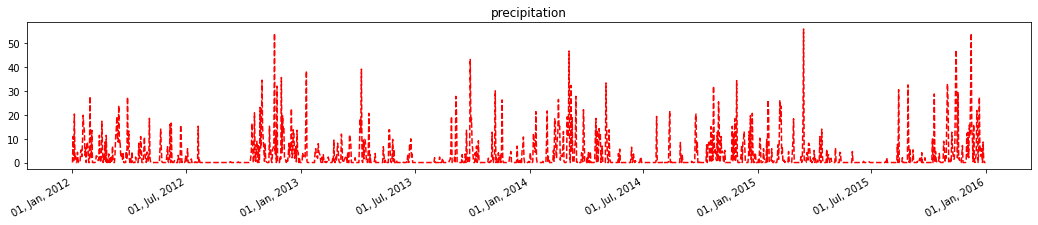

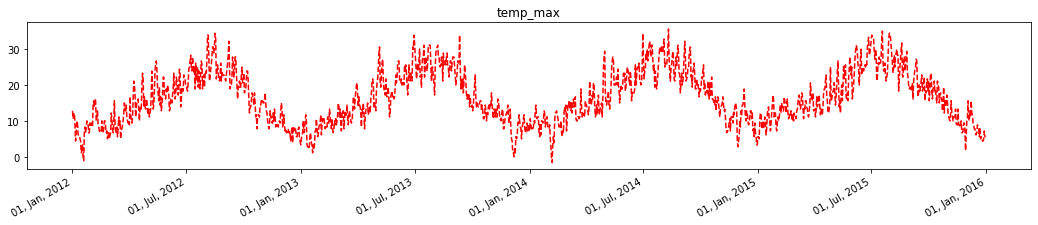

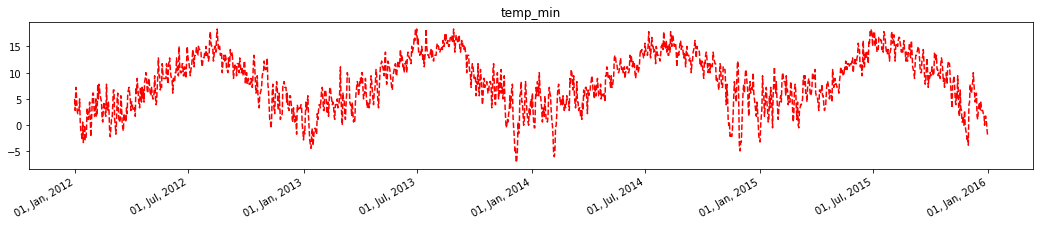

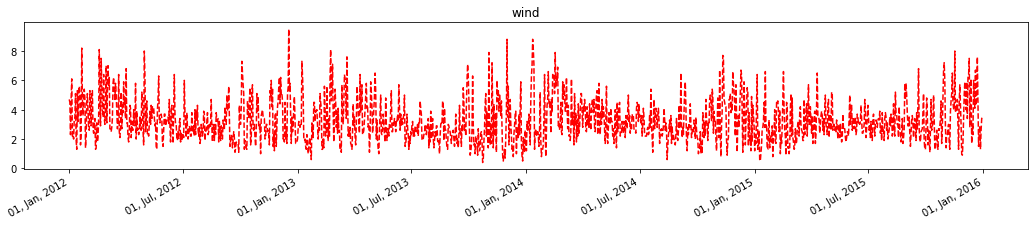

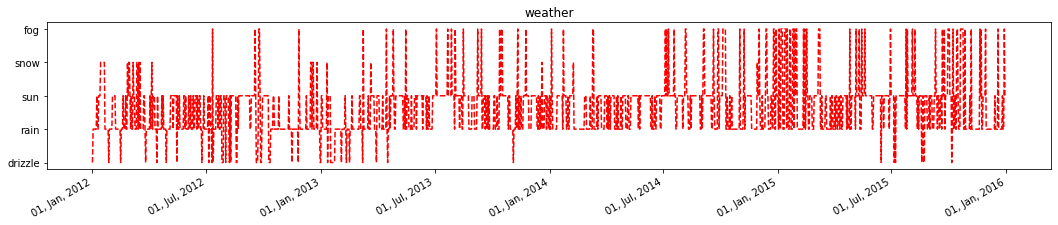

In [17]:
dfrain = df.drop(['weather'], axis=1)
sensors=df.columns
for sensor in sensors:
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='red',linestyle='--')
    plt.title(sensor)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.show()

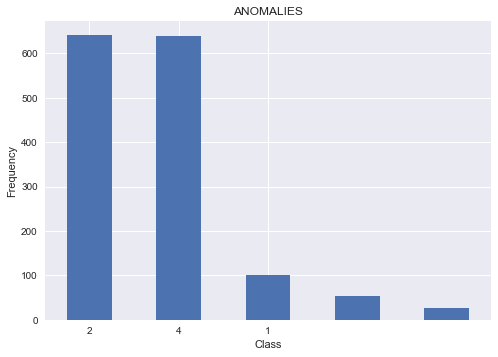

In [30]:
count_classes = pd.value_counts(df['weather'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("ANOMALIES")
plt.xticks(range(3))
plt.xlabel("Class")
plt.ylabel("Frequency");

In [19]:
df['weather'].unique()
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [20]:
le = LabelEncoder()
df['weather']= le.fit_transform(df['weather'])

In [22]:
df['weather'].unique()
df['weather'].value_counts()

2    641
4    640
1    101
0     53
3     26
Name: weather, dtype: int64

In [21]:
df.head(5)

,precipitation,temp_max,temp_min,wind,weather
time,,,,,
2012-01-01,0.0,12.8,5.0,4.7,0
2012-01-02,10.9,10.6,2.8,4.5,2
2012-01-03,0.8,11.7,7.2,2.3,2
2012-01-04,20.3,12.2,5.6,4.7,2
2012-01-05,1.3,8.9,2.8,6.1,2


## CHANCES OF RAIN

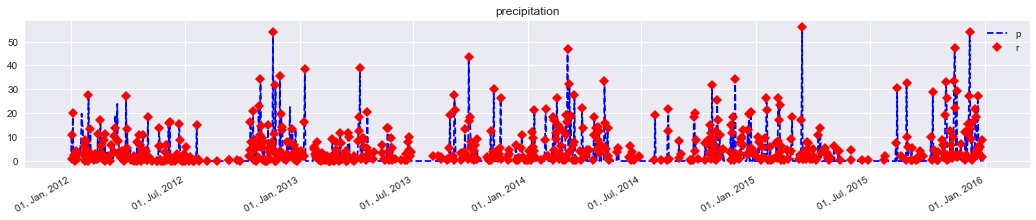

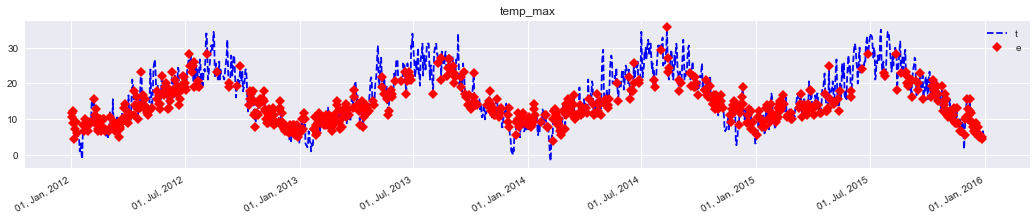

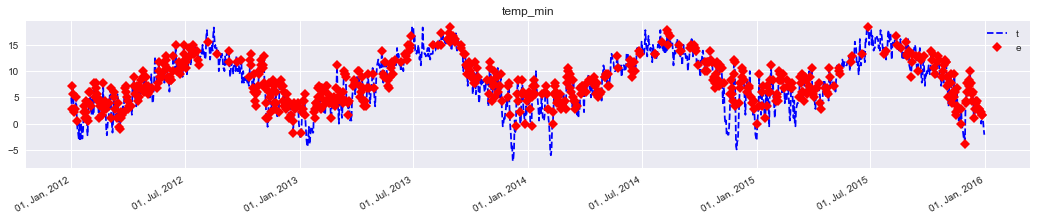

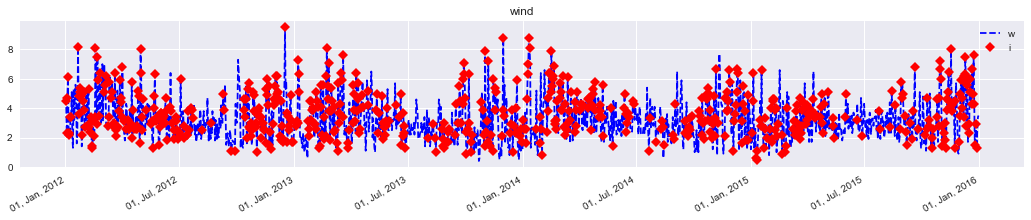

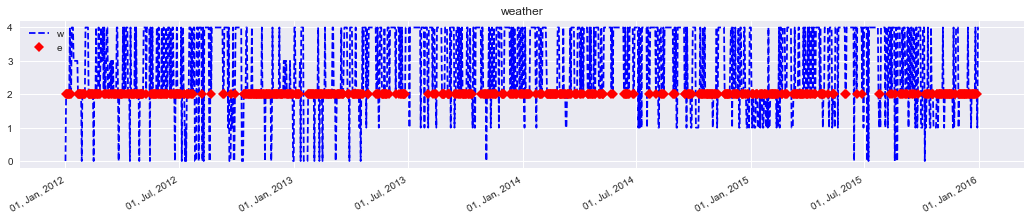

In [55]:
 RAIN= df[df['weather']==2]


df_Sensors = df.drop(['weather'], axis=1)
sensors=df.columns
for sensor in sensors:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='blue',linestyle='--', zorder=1)
    plt.plot(RAIN[sensor], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.title(sensor)
    plt.legend(sensor)
    plt.show()

## Chances of SUNNY

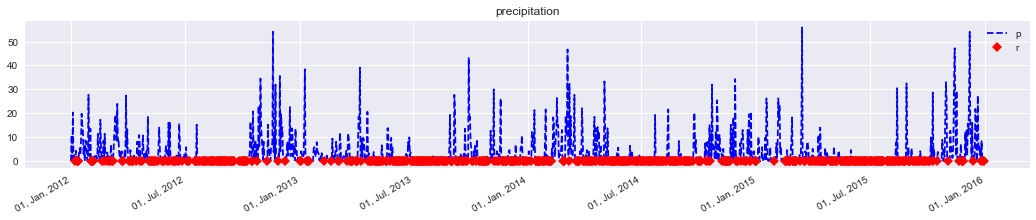

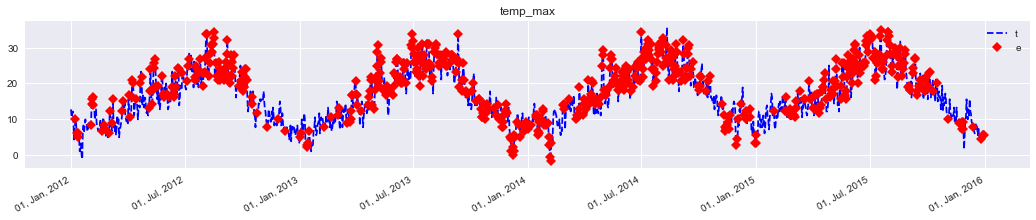

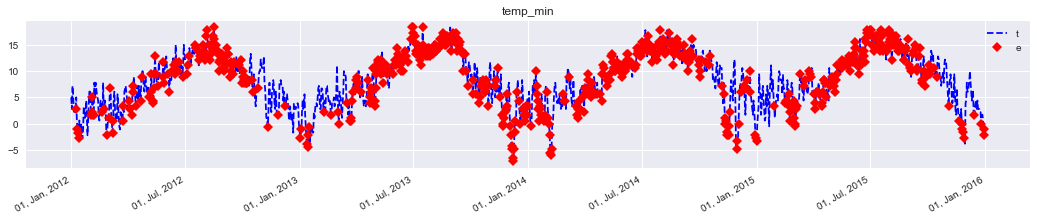

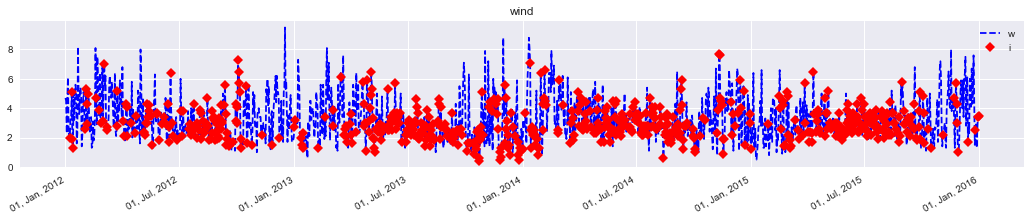

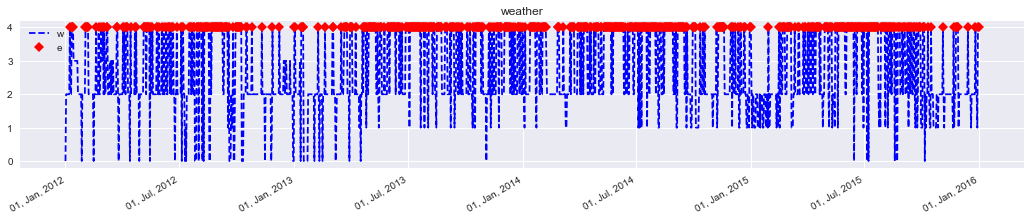

In [56]:
SUN= df[df['weather']==4]
for sensor in sensors:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='blue',linestyle='--', zorder=1)
    plt.plot(SUN[sensor], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.title(sensor)
    plt.legend(sensor)
    plt.show()

## CHANCES OF FOG

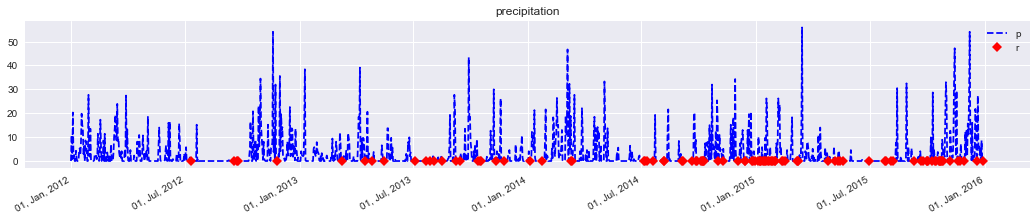

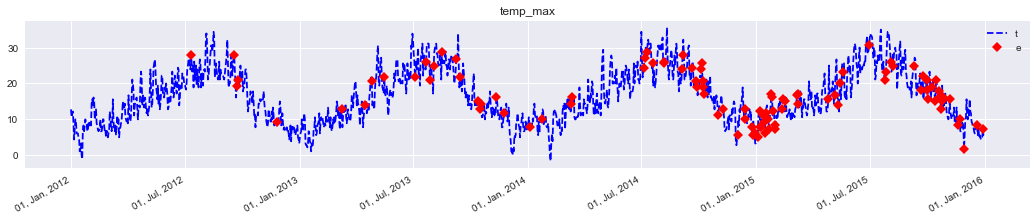

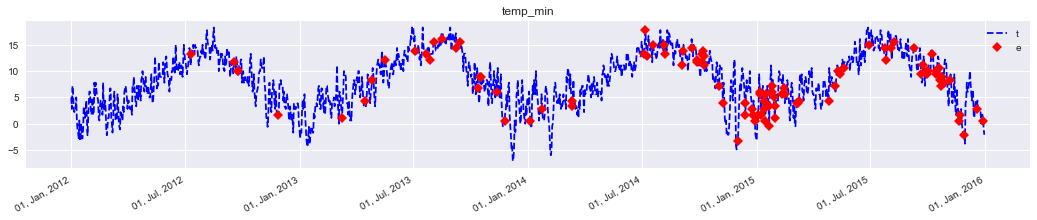

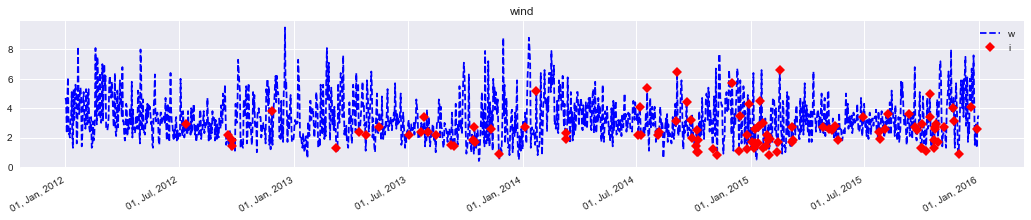

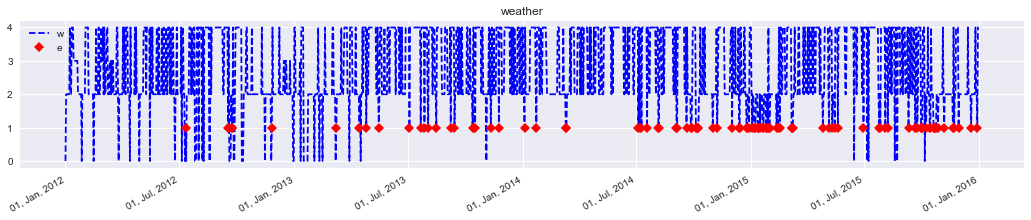

In [59]:
FOG= df[df['weather']==1]
for sensor in sensors:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='blue',linestyle='--', zorder=1)
    plt.plot(FOG[sensor], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.title(sensor)
    plt.legend(sensor)
    plt.show()

## CHANCES OF DRIZZLING

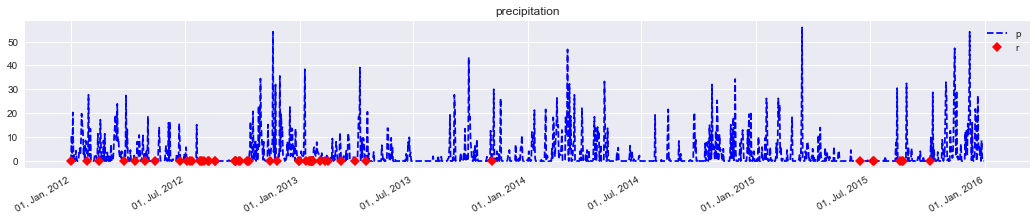

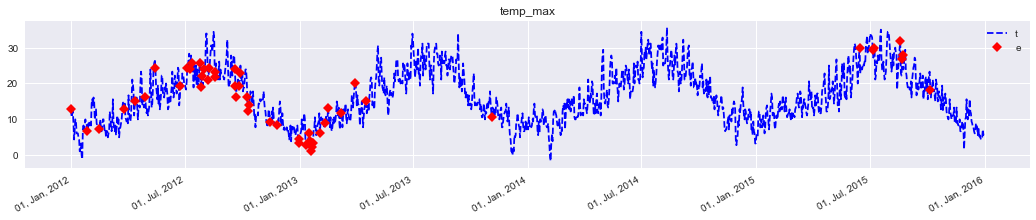

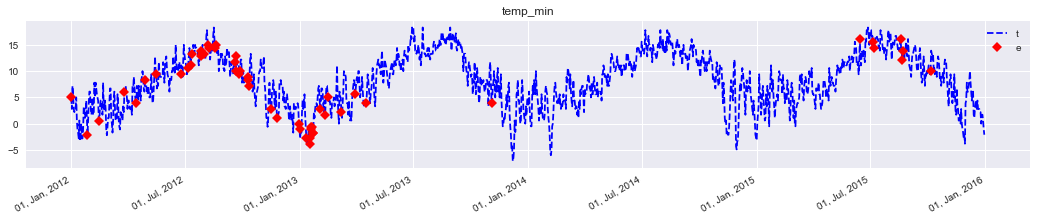

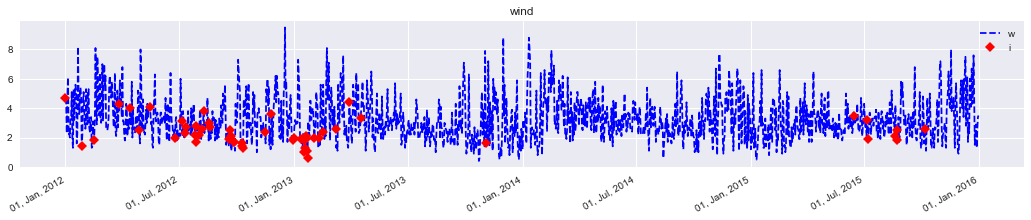

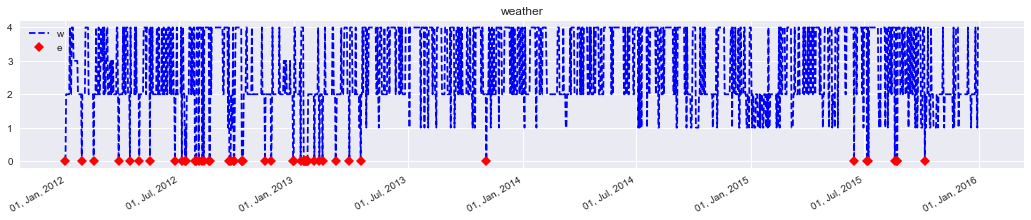

In [61]:
DRIZZLE= df[df['weather']==0]
for sensor in sensors:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='blue',linestyle='--', zorder=1)
    plt.plot(DRIZZLE[sensor], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.title(sensor)
    plt.legend(sensor)
    plt.show()

## CHANCES OF SNOW

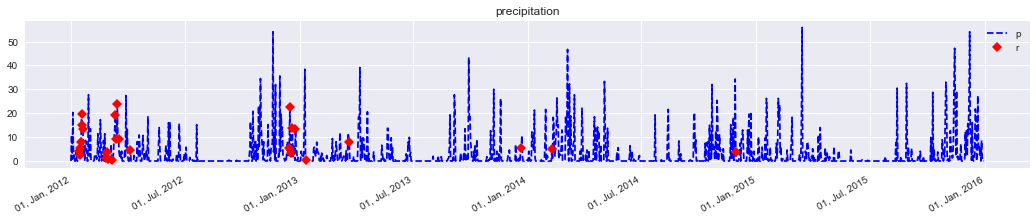

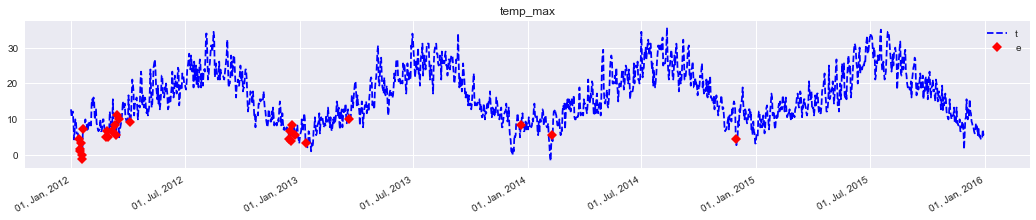

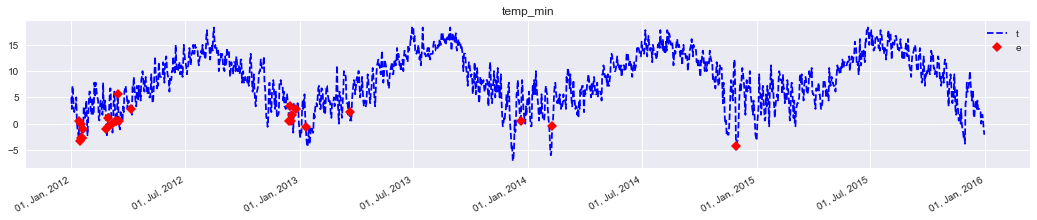

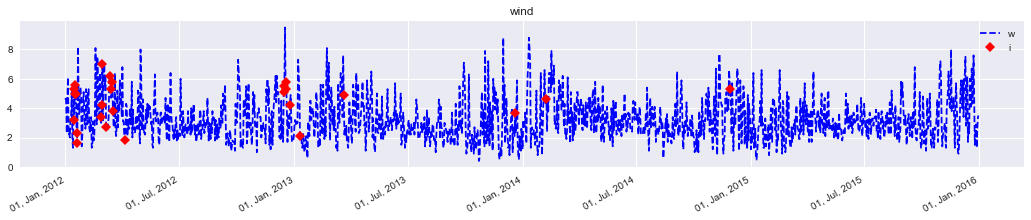

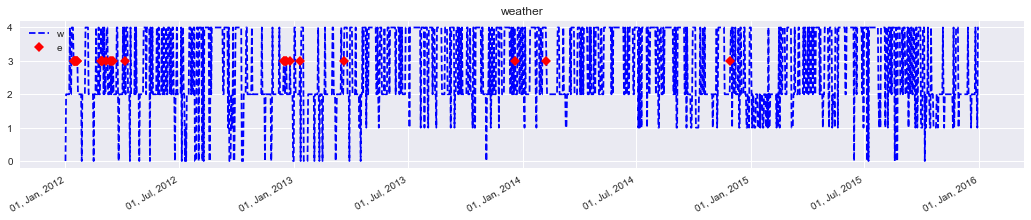

In [62]:
SNOW= df[df['weather']==3]
for sensor in sensors:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='blue',linestyle='--', zorder=1)
    plt.plot(SNOW[sensor], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.title(sensor)
    plt.legend(sensor)
    plt.show()

In [34]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df,column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(df, autolag='AIC')
    else:
        adf_test = adfuller(df[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    print(f'ADF Statistic: {adf_test[0]}')
    print(f'n_lags: {adf_test[2]}')
    print(f'p-value: {adf_test[1]:.20f}')
    for key, value in adf_test[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    return test_result

In [35]:
adf_test_results = {
    col: test_stationarity(df, col)
    for col in df.columns} 

ADF Statistic: -16.797530555019122
n_lags: 2
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.434843038681996
Critial Values:
   5%, -2.8635243777871286
Critial Values:
   10%, -2.56782646544019
ADF Statistic: -2.429204969464814
n_lags: 13
p-value: 0.13366259188431384164
Critial Values:
   1%, -3.4348772553489617
Critial Values:
   5%, -2.8635394783531085
Critial Values:
   10%, -2.5678345067434516
ADF Statistic: -2.6056195336347874
n_lags: 13
p-value: 0.09184137745870379899
Critial Values:
   1%, -3.4348772553489617
Critial Values:
   5%, -2.8635394783531085
Critial Values:
   10%, -2.5678345067434516
ADF Statistic: -24.50737190120077
n_lags: 0
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.434836872962171
Critial Values:
   5%, -2.863521656701378
Critial Values:
   10%, -2.567825016419591
ADF Statistic: -5.171508486696197
n_lags: 17
p-value: 0.00001004929335213669
Critial Values:
   1%, -3.434889827343955
Critial Values:
   5%, -2.863545026607168
Critial Values:
 

In [36]:
adf_test_results

{'precipitation': 'Stationary',
 'temp_max': 'Non-Stationary',
 'temp_min': 'Non-Stationary',
 'wind': 'Stationary',
 'weather': 'Stationary'}

In [37]:
from statsmodels.tsa.stattools import acf, pacf
from matplotlib import dates as mpl_dates

In [38]:
def check_mean_std(ts, name):

    rolmean = ts.rolling(window=192).mean()
    rolstd = ts.rolling(window=192).std()
    plt.figure(figsize=(12,8))   
    print(name)
    
    plt.style.use('seaborn')
    plt.figure(figsize=(12,8))
    plt.plot(ts, color='red',label='Original')
    plt.plot(rolmean, color='black', label='Rolling Mean')
    plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.tight_layout()
    plt.xlabel("Date")
    plt.ylabel("WIND")
    plt.title('Log Scale Differeced WIND Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()



WIND


<Figure size 864x576 with 0 Axes>

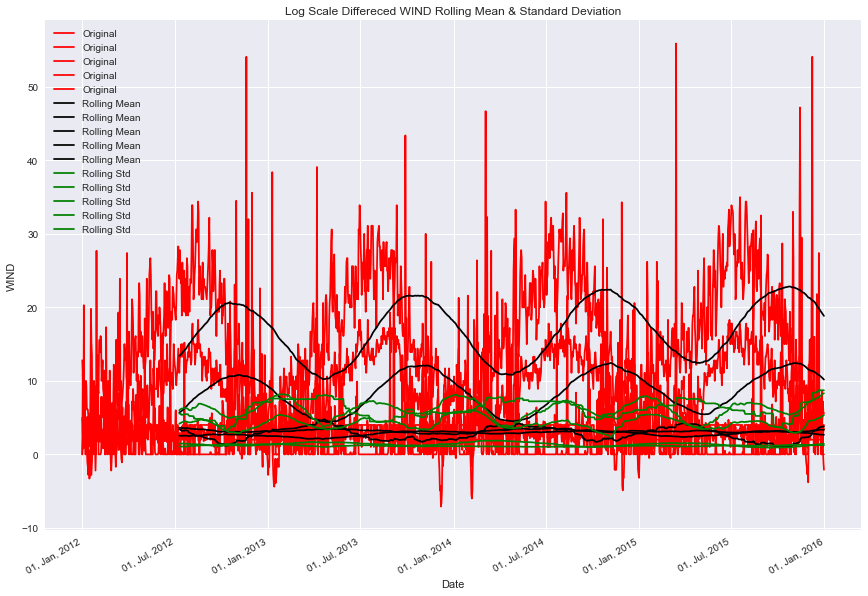

In [39]:
check_mean_std(df,'\n\nWIND')

In [43]:
print("number of samples :", df.shape[0])
print("number of anomalies1 : ", SNOW.shape[0])
print("number of anomalies2 : ", DRIZZLE.shape[0])
print("number of anomalies3 : ", DRIZZLE.shape[0])



number of samples : 1461
number of anomalies1 :  53


In [51]:
RAIN.shape

(641, 5)

In [52]:
SNOW.shape

(26, 5)

In [53]:
FOG.shape

(101, 5)

In [54]:
DRIZZLE.shape

(53, 5)

In [57]:
adf_test_results = {
    col: test_stationarity(RAIN, col)
    for col in df.columns} 

ADF Statistic: -5.641716097770198
n_lags: 11
p-value: 0.00000103289851673905
Critial Values:
   1%, -3.4407890899441127
Critial Values:
   5%, -2.8661459340578905
Critial Values:
   10%, -2.5692228868342766
ADF Statistic: -2.743618880198177
n_lags: 6
p-value: 0.06678962049058555228
Critial Values:
   1%, -3.4407064257994495
Critial Values:
   5%, -2.866109523416927
Critial Values:
   10%, -2.5692034867497937
ADF Statistic: -3.2078715196496606
n_lags: 7
p-value: 0.01953354212840878110
Critial Values:
   1%, -3.4407228537258865
Critial Values:
   5%, -2.866116759417764
Critial Values:
   10%, -2.5692073421780983
ADF Statistic: -19.20491617859206
n_lags: 0
p-value: 0.00000000000000000000
Critial Values:
   1%, -3.4406089407081604
Critial Values:
   5%, -2.866066583404541
Critial Values:
   10%, -2.5691806079101562
ADF Statistic: nan
n_lags: 0
p-value: nan
Critial Values:
   1%, -3.4406089407081604
Critial Values:
   5%, -2.866066583404541
Critial Values:
   10%, -2.5691806079101562


C:\Users\Anand\.conda\envs\newproject\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
